In [1]:
from __future__ import print_function
import sdm as sdmlib
from sdm import utils
from scipy.stats import binom

* d = distance to the target
* h = number of activated hardlocations
* s = total stored bitstrings
* H = number of hardlocations
* w = number of times the target bitstring has been written

In [2]:
_phi_fn_cache = {}

In [3]:
def phi_fn(n, H, r, d, steps=2**9):
    key = (n, H, r, d, steps)
    if key in _phi_fn_cache:
        return _phi_fn_cache[key]
    v = []
    for _ in range(steps):
        bs1 = sdmlib.Bitstring.init_random(n)
        bs2 = bs1.copy()
        bs2.flip_random_bits(d)
        selected1 = address_space.scan_thread2(bs1, r)
        selected2 = address_space.scan_thread2(bs2, r)
        x = len(set(selected1) & set(selected2))
        v.append(x)
    mu = 1.0*sum(v)/len(v)
    _phi_fn_cache[key] = mu
    return mu

In [4]:
def prob_wrong_bit0(h, H, s, w, d, phi, theta):
    x = 1.0*s*h*h/(2*H)
    return 1 - binom.cdf(x, theta, 0.5)

In [5]:
def prob_wrong_bit1(h, H, s, w, d, phi, theta):
    x = s*h*h/(2*H)-w*phi
    return binom.cdf(x, theta, 0.5)

In [6]:
def prob_wrong(n, h, H, s, w, d):
    phi = phi_fn(n, H, r, d)
    theta = 1.0*s*h*h/H - w*phi
    p0 = prob_wrong_bit0(h, H, s, w, d, phi, theta)
    p1 = prob_wrong_bit1(h, H, s, w, d, phi, theta)
    return (p0+p1)/2.0

In [7]:
# number of dimensions of the memory
n = 256

# number of hard locations
H = 2**20


r = 104  # THIS IS THE ONE TO FIX

# number of random writes
s = 2**10 * 10
w = 1


In [8]:
p = utils.calculate_probability(n, r)
h = p*H
address_space = sdmlib.AddressSpace.init_random(n, H)

In [9]:
distances = list(range(32, 32 + n//2))
y_values = []
err_values = []
for d in distances:
    print('Calculating for d={}... '.format(d), end='')
    y = prob_wrong(n=n, h=h, H=H, s=s, w=w, d=d)
    err = abs(y - 1.0*d/n)
    print(y, err)
    y_values.append(y)
    err_values.append(err)

Calculating for d=32... 

/anaconda/lib/python3.6/site-packages/scipy/stats/_discrete_distns.py:56: RuntimeWarning: floating point number truncated to an integer
  vals = special.bdtr(k, n, p)


0.0106136524375 0.114386347562
Calculating for d=33... 0.0166541402646 0.112252109735
Calculating for d=34... 0.016405085167 0.116407414833
Calculating for d=35... 0.0240126979891 0.112706052011
Calculating for d=36... 0.0240126979883 0.116612302012
Calculating for d=37... 0.0334669622398 0.11106428776
Calculating for d=38... 0.0334669622398 0.11497053776
Calculating for d=39... 0.0446324685731 0.107711281427
Calculating for d=40... 0.0446324685697 0.11161753143
Calculating for d=41... 0.0579062884463 0.102249961554
Calculating for d=42... 0.0579062884491 0.106156211551
Calculating for d=43... 0.0732473052479 0.0947214447521
Calculating for d=44... 0.0724131626533 0.0994618373467
Calculating for d=45... 0.0895410206215 0.0862402293785
Calculating for d=46... 0.0885706703096 0.0911168296904
Calculating for d=47... 0.10615174178 0.0774420082195
Calculating for d=48... 0.105052738884 0.0824472611159
Calculating for d=49... 0.12486986119 0.0665363888097
Calculating for d=50... 0.1236367243

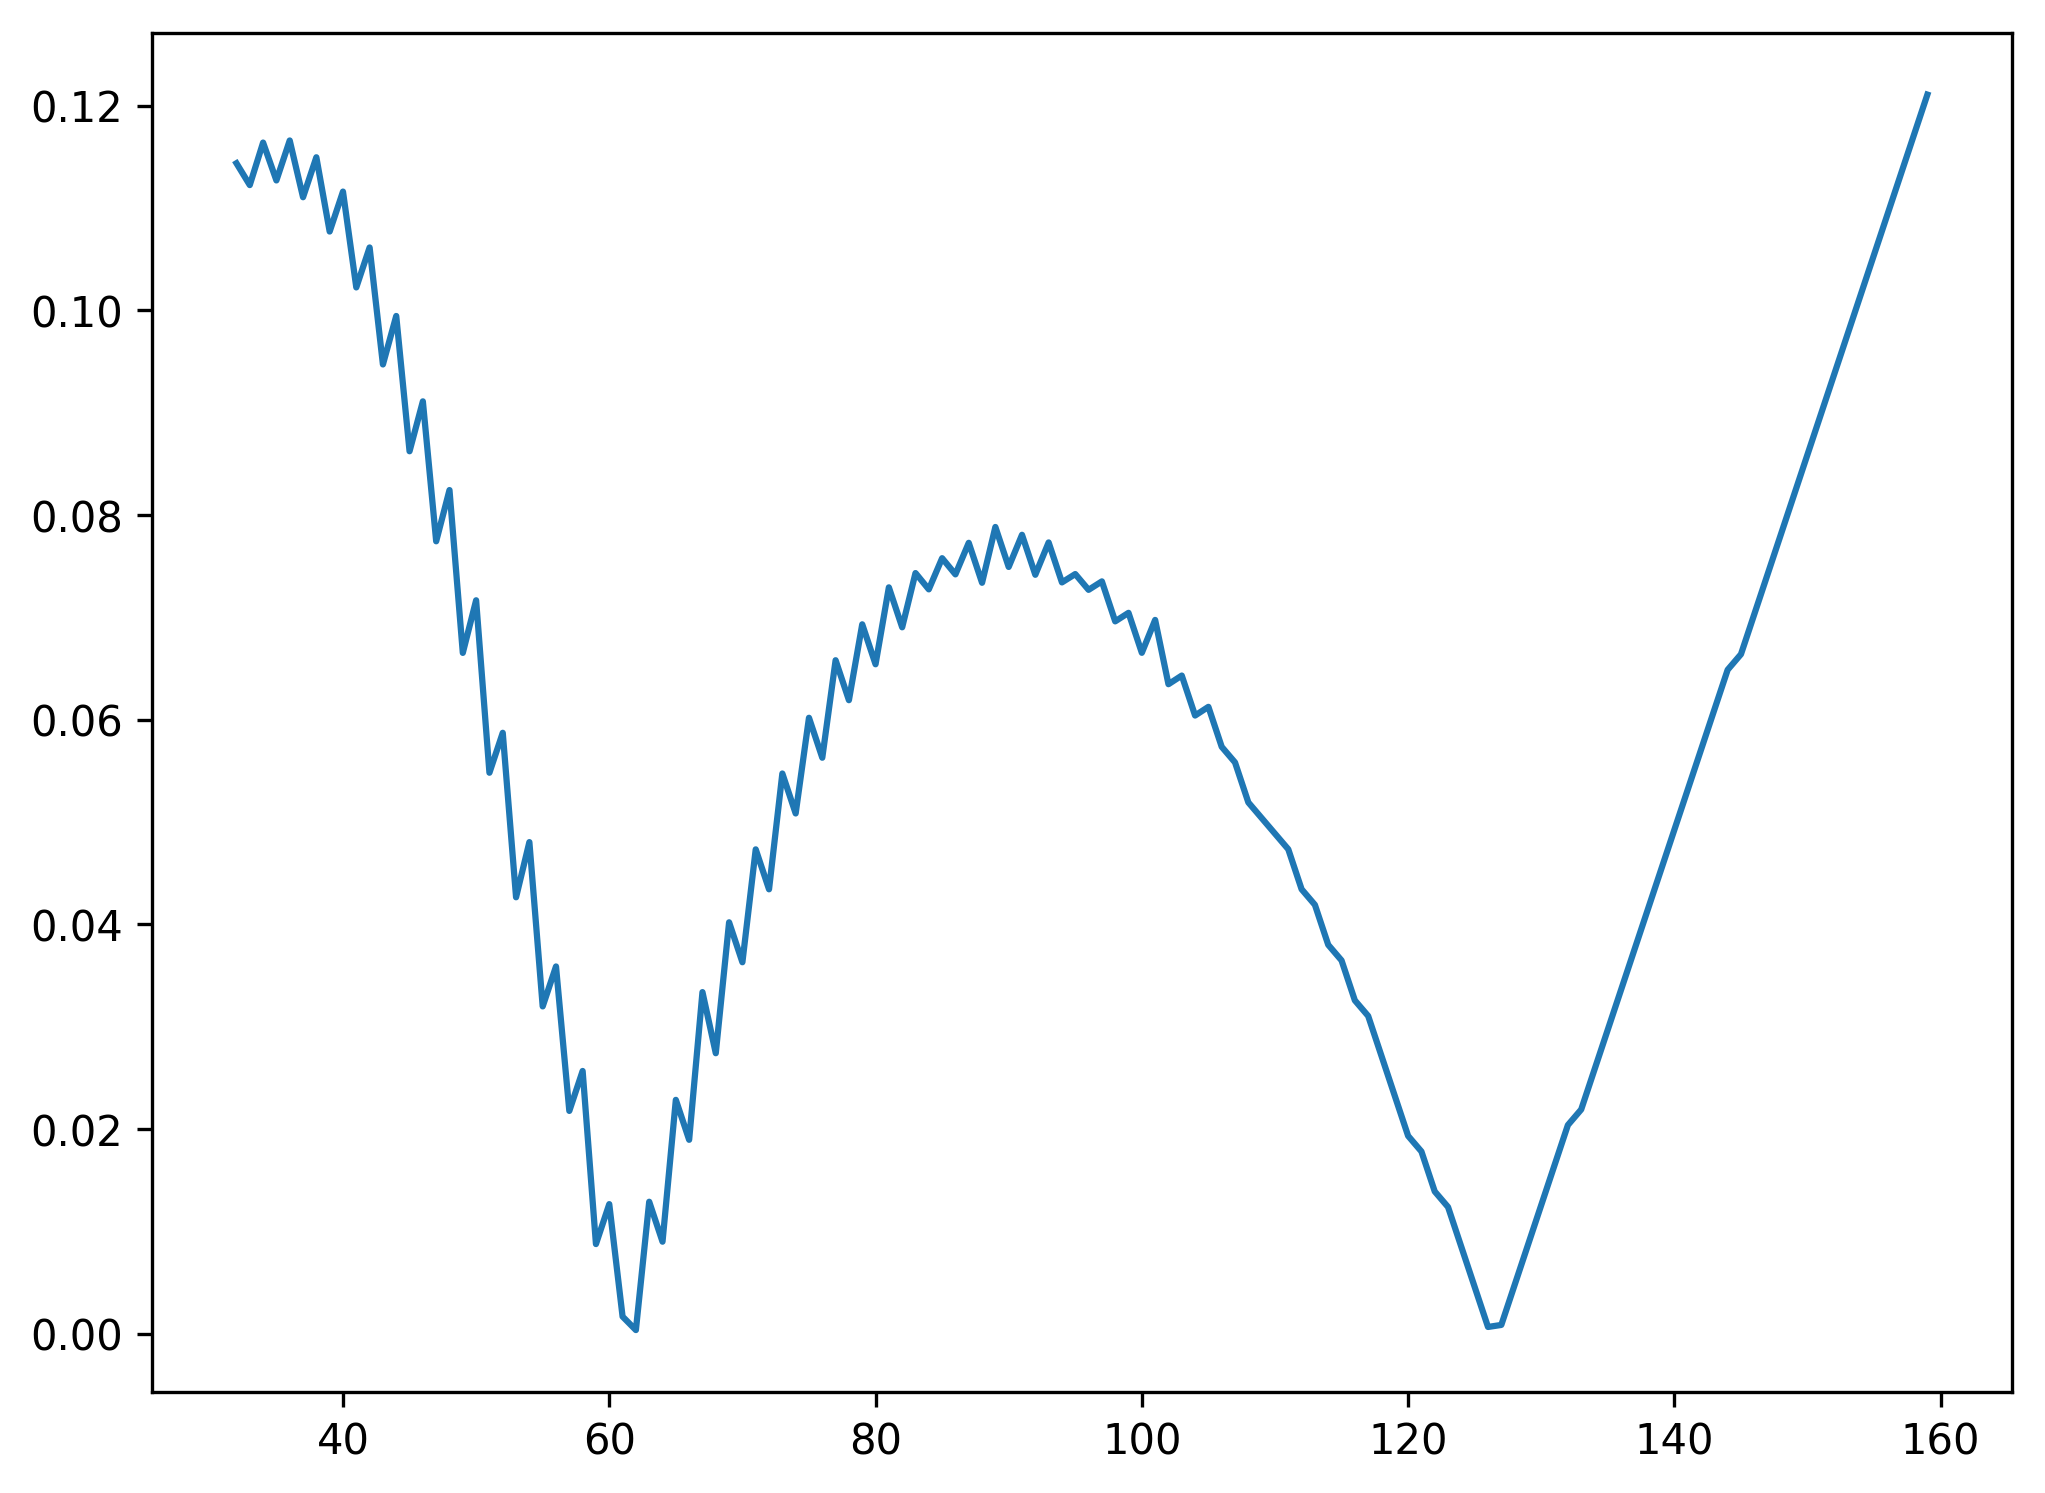

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(distances, err_values)
plt.show()